K-Means 군집분석은 비지도 학습 알고리즘으로, 데이터를 여러 개의 군집(cluster)으로 나누어 각 군집 내의 데이터들이 최대한 유사하도록 하는 방법입니다. 

1.초기 중심 설정: 먼저 데이터에서 원하는 군집의 개수(k)만큼 임의의 중심점(centroid)을 선택합니다. 이 중심점들은 초기화 단계에서 무작위로 선택될 수 있습니다.

2.데이터 포인트 할당: 각 데이터 포인트를 가장 가까운 중심점에 할당합니다. 이때 가까움의 기준은 보통 유클리드 거리(Euclidean distance)를 사용합니다.

3.중심점 갱신: 각 군집에 속한 데이터 포인트들의 평균을 계산하여 새로운 중심점으로 설정합니다.

4.반복: 데이터 포인트 할당과 중심점 갱신 단계를 중심점이 더 이상 크게 움직이지 않을 때까지 반복합니다. 이 과정은 각 군집 내의 데이터 포인트들이 최대한 유사하고, 군집 간의 차이가 최대화될 때까지 진행됩니다.

5.종료 조건: 알고리즘은 중심점이 거의 변하지 않거나 지정된 최대 반복 횟수에 도달하면 종료됩니다.

### 1. 가상고객 데이터 : 군집=3

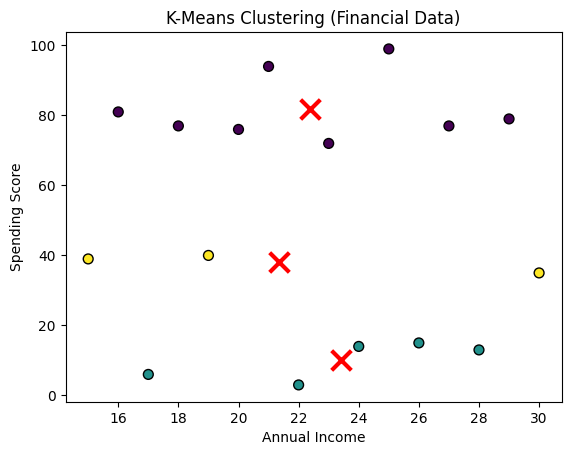

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 금융 데이터 로드 (예: 가상의 고객 데이터)
data = {
    '연소득': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    '지출점수': [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35]
}

# DataFrame 생성
X = pd.DataFrame(data)

# K-Means 모델 생성 및 학습
n_clusters = 3
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

# 예측 결과 얻기
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# 결과 시각화
plt.scatter(X['연소득'], X['지출점수'], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clustering (Financial Data)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


군집 중심:

빨간색 'X' 표시는 각 군집의 중심(centroid)을 나타냅니다.
중심은 해당 군집 내 모든 데이터 포인트의 평균적인 위치를 나타내며, 각 군집의 특성을 요약하는 역할을 합니다. 
예를 들어, 연소득과 지출 점수가 평균적인 고객들의 위치를 나타내며, 군집의 대표적인 특성을 보여줍니다.

군집의 해석:

군집 1: 연소득이 상대적으로 낮고 지출 점수도 낮은 고객들이 포함될 수 있습니다. 이러한 고객은 아마도 구매력과 지출 성향이 모두 낮은 집단일 것입니다.

군집 2: 연소득이 중간 정도이며 지출 점수가 높은 고객들이 포함될 수 있습니다. 이 그룹은 상대적으로 중간 수준의 소득을 가지고 있으면서 지출을 많이 하는 경향을 나타낼 수 있습니다.

군집 3: 연소득이 높거나 중간 수준이고 지출 점수가 낮은 고객들이 포함될 수 있습니다. 이 그룹은 소득은 있지만 소비를 절제하는 경향이 있는 고객들일 수 있습니다.

활용 방안:
이러한 군집화 결과를 통해 고객 그룹별로 다른 마케팅 전략을 수립할 수 있습니다.
예를 들어, 지출 점수가 높은 고객에게는 추가적인 할인 혜택을 제공하거나, 지출 점수가 낮은 고객을 대상으로는 지출을 유도하는 프로모션을 제공하는 등의 전략을 세울 수 있습니다.

군집별로 데이터 새로 정렬

    연소득  지출점수  군집
0    16    81   0
1    18    77   0
2    20    76   0
3    21    94   0
4    23    72   0
5    25    99   0
6    27    77   0
7    29    79   0
8    17     6   1
9    22     3   1
10   24    14   1
11   26    15   1
12   28    13   1
13   15    39   2
14   19    40   2
15   30    35   2


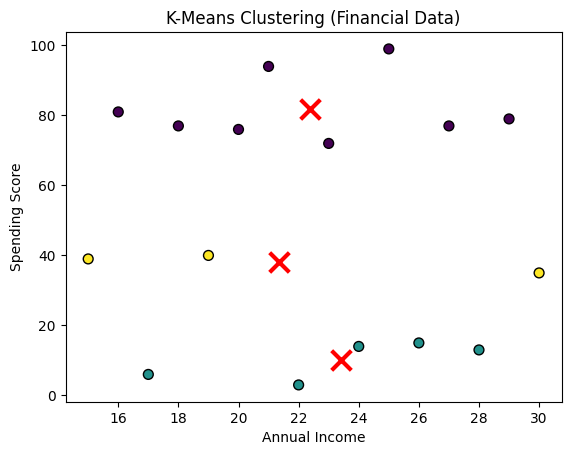

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 금융 데이터 로드 (예: 가상의 고객 데이터)
data = {
    '연소득': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    '지출점수': [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35]
}

# DataFrame 생성
X = pd.DataFrame(data)

# K-Means 모델 생성 및 학습
n_clusters = 3
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

# 예측 결과 얻기
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# 군집 레이블을 데이터프레임에 추가
X['군집'] = labels

# 군집별로 정렬된 데이터프레임 생성
sorted_X = X.sort_values(by='군집').reset_index(drop=True)
print(sorted_X)

# 결과 시각화
plt.scatter(X['연소득'], X['지출점수'], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clustering (Financial Data)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


군집=2 경우

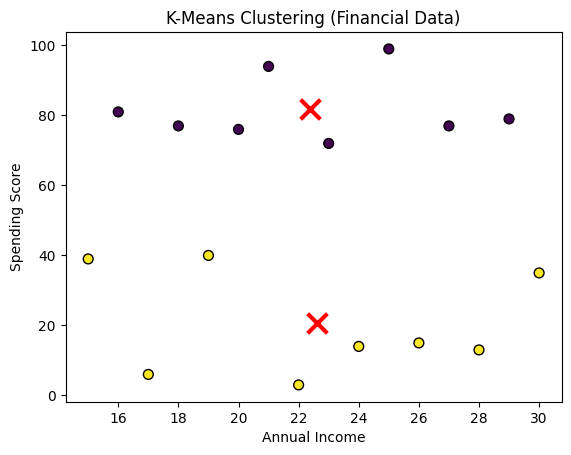

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 금융 데이터 로드 (예: 가상의 고객 데이터)
data = {
    '연소득': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    '지출점수': [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35]
}

# DataFrame 생성
X = pd.DataFrame(data)

# K-Means 모델 생성 및 학습
n_clusters = 2
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

# 예측 결과 얻기
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# 결과 시각화
plt.scatter(X['연소득'], X['지출점수'], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clustering (Financial Data)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


군집=2(0,1)별로 대이터 정렬

    연소득  지출점수  군집
0    16    81   0
1    18    77   0
2    20    76   0
3    21    94   0
4    23    72   0
5    25    99   0
6    27    77   0
7    29    79   0
8    15    39   1
9    17     6   1
10   19    40   1
11   22     3   1
12   24    14   1
13   26    15   1
14   28    13   1
15   30    35   1


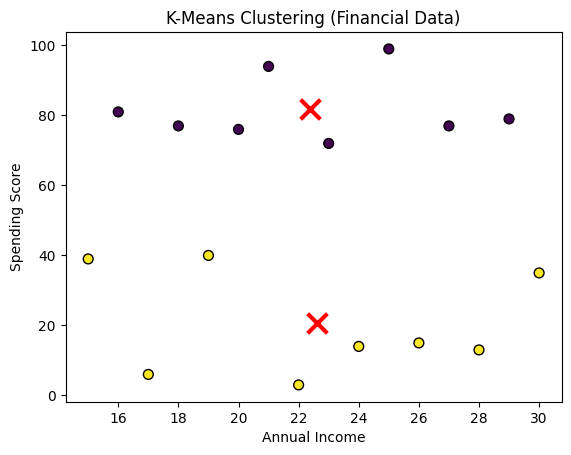

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 금융 데이터 로드 (예: 가상의 고객 데이터)
data = {
    '연소득': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    '지출점수': [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35]
}

# DataFrame 생성
X = pd.DataFrame(data)

# K-Means 모델 생성 및 학습
n_clusters = 2
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

# 예측 결과 얻기
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_


# 군집 레이블을 데이터프레임에 추가
X['군집'] = labels

# 군집별로 정렬된 데이터프레임 생성
sorted_X = X.sort_values(by='군집').reset_index(drop=True)
print(sorted_X)

# 결과 시각화
plt.scatter(X['연소득'], X['지출점수'], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clustering (Financial Data)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()



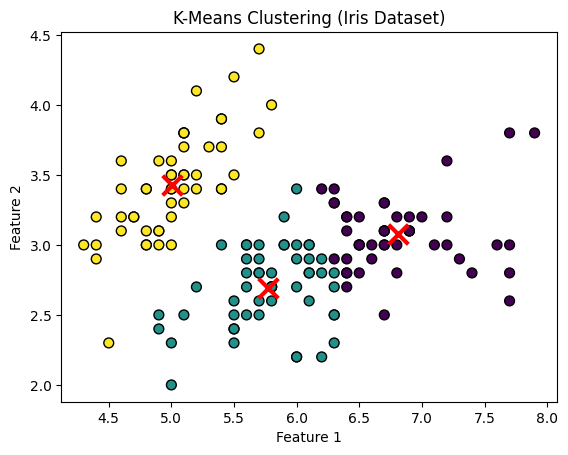

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# 데이터 생성 (Iris 데이터셋 사용)
data = load_iris()
X = data.data[:, :2]  # 첫 두 개의 feature만 사용

# K-Means 모델 생성 및 학습
n_clusters = 3
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

# 예측 결과 얻기
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clustering (Iris Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


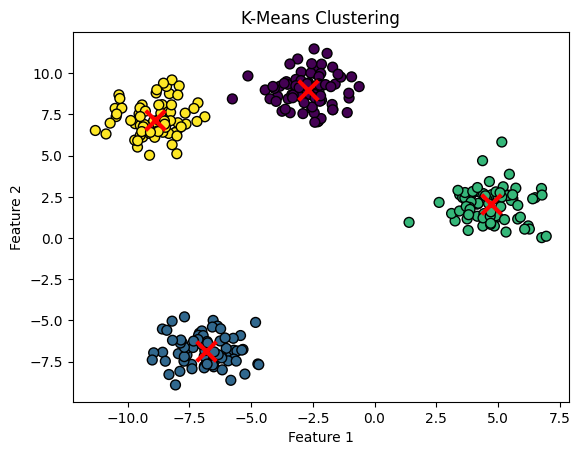

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 데이터 생성
n_samples = 300
n_features = 2
n_clusters = 4
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

# 예측 결과 얻기
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
